In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [2]:
def fx(theta):
    #return sum(theta**2) #Q1a, Q1b
    #return sum((theta-np.ones(theta.shape))**2) #Q1c, Q1d
    return sum((y-np.matmul(x, theta))**2) #Q1e
    

def delop(theta0, dx):
    theta = np.copy(theta0)
    ans = np.zeros(theta0.shape)
    for i in range(len(theta)):
        theta[i] += dx
        ans[i] = (fx(theta)-fx(theta0))/dx
        theta[i] -= dx
    return ans

In [11]:
theta = np.vstack([50.2, 100.5])
alpha = 0.01
for i in range(1000):
    theta -= alpha*delop(theta, 10**-9)
print(theta)

[[23.7181018 ]
 [-6.86698641]]


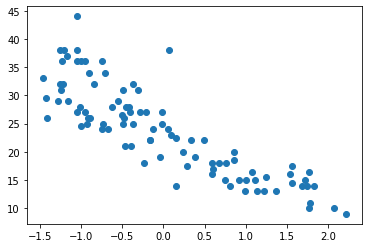

In [4]:
data = pd.read_excel('dat.xlsx')
x = np.array(data['x'])
x = (x-np.mean(x))/np.std(x)
y = np.array(data['y'])
plt.scatter(x, y)
plt.show()

In [6]:
x = np.array([np.ones(len(x)), x]).transpose()
y = np.vstack(y)
theta = np.vstack([-50.0, 20.9])
print(x.shape, theta.shape)

alpha = 0.01
itr = 1000
for i in range(itr):
    theta -= alpha*delop(theta, 10**-5)
print(theta)

(94, 2) (2, 1)
[[23.71808011]
 [-6.86700045]]


In [7]:
def hx(theta, x):
    return np.matmul(x, theta)

def delop_stochastic(theta0, dx):
    theta = np.copy(theta0)
    ans = np.zeros(theta0.shape)
    sample_indx = rd.randint(0, len(x)-1)
    for i in range(len(theta)):
        theta[i] += dx
        ans[i] = ((hx(theta, x[sample_indx])-y[sample_indx])**2-(hx(theta0, x[sample_indx])-y[sample_indx])**2)/dx
        theta[i] -= dx
    return ans

In [8]:
theta = np.vstack([-50.0, 20.9])
alpha = 0.01
itr = 10000
for i in range(itr):
    theta -= alpha*delop_stochastic(theta, 10**-9)
print(theta, float(fx(theta)))

[[23.42906909]
 [-7.19332671]] 1590.512467920664


In [9]:
def next_alpha(alpha, theta0, da):
    delj = delop(theta0, da**2)
    fpxh = (fx(theta0 - (alpha+da)*delj)-fx(theta0 - (alpha)*delj))/da
    fpx = (fx(theta0 - (alpha)*delj)-fx(theta0 - (alpha-da)*delj))/da
    fppx = (fpxh-fpx)/da
    return alpha - (fpx/fppx)

In [10]:
theta = np.vstack([50.0, 50.0])
itr = 10000
alpha = 50
for i in range(itr):
    alpha = next_alpha(alpha, theta, 10**-4)
    theta_nxt = theta - alpha*delop(theta, 10**-4)
    if sum((theta_nxt-theta)**2) < 10**-10:
        print('Convergence in {} iterations with alpha = {}!'.format(i, *alpha))
        break
    theta = theta_nxt.copy()
print(theta)

Convergence in 5 iterations with alpha = 0.005361478836185981!
[[23.71803507]
 [-6.86704553]]
